<a href="https://colab.research.google.com/github/ayten21/Tensorflow/blob/main/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-08-04 08:29:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.130.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  68.7MB/s    in 1.5s    

2022-08-04 08:29:45 (68.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") 

  return img

Image shape: (512, 512, 3)


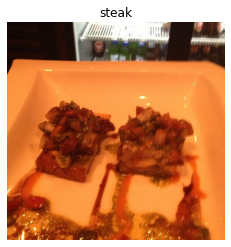

In [9]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [10]:
img

array([[[ 14,   4,   2],
        [ 14,   4,   2],
        [ 14,   4,   2],
        ...,
        [255, 255, 244],
        [252, 253, 237],
        [244, 243, 223]],

       [[ 14,   4,   2],
        [ 14,   4,   2],
        [ 14,   4,   2],
        ...,
        [255, 255, 244],
        [250, 251, 235],
        [241, 240, 222]],

       [[ 15,   5,   3],
        [ 15,   5,   3],
        [ 15,   5,   3],
        ...,
        [255, 255, 246],
        [250, 248, 233],
        [238, 235, 218]],

       ...,

       [[171,  58,   0],
        [190,  77,  17],
        [207,  97,  36],
        ...,
        [250, 141,  56],
        [249, 140,  55],
        [249, 140,  55]],

       [[177,  68,   0],
        [211, 104,  34],
        [230, 123,  53],
        ...,
        [250, 141,  56],
        [249, 140,  55],
        [249, 140,  55]],

       [[181,  75,   1],
        [226, 123,  48],
        [244, 141,  66],
        ...,
        [248, 139,  54],
        [247, 138,  53],
        [246, 137,  52]]

In [11]:
img.shape

(512, 512, 3)

In [12]:
img/255. 

array([[[0.05490196, 0.01568627, 0.00784314],
        [0.05490196, 0.01568627, 0.00784314],
        [0.05490196, 0.01568627, 0.00784314],
        ...,
        [1.        , 1.        , 0.95686275],
        [0.98823529, 0.99215686, 0.92941176],
        [0.95686275, 0.95294118, 0.8745098 ]],

       [[0.05490196, 0.01568627, 0.00784314],
        [0.05490196, 0.01568627, 0.00784314],
        [0.05490196, 0.01568627, 0.00784314],
        ...,
        [1.        , 1.        , 0.95686275],
        [0.98039216, 0.98431373, 0.92156863],
        [0.94509804, 0.94117647, 0.87058824]],

       [[0.05882353, 0.01960784, 0.01176471],
        [0.05882353, 0.01960784, 0.01176471],
        [0.05882353, 0.01960784, 0.01176471],
        ...,
        [1.        , 1.        , 0.96470588],
        [0.98039216, 0.97254902, 0.91372549],
        [0.93333333, 0.92156863, 0.85490196]],

       ...,

       [[0.67058824, 0.22745098, 0.        ],
        [0.74509804, 0.30196078, 0.06666667],
        [0.81176471, 0

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3,
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 27s 210ms/step - loss: 0.5999 - accuracy: 0.6540 - val_loss: 0.4815 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4547 - accuracy: 0.7893 - val_loss: 0.3525 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4235 - accuracy: 0.8140 - val_loss: 0.3435 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3728 - accuracy: 0.8347 - val_loss: 0.3200 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3437 - accuracy: 0.8547 - val_loss: 0.3160 - val_accuracy: 0.8800


In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [15]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), 
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_2 = model_2.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, 
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 0.7666 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), 
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), 
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 2.4935 - accuracy: 0.6327 - val_loss: 1.2801 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6649 - accuracy: 0.7373 - val_loss: 0.7094 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6981 - accuracy: 0.7373 - val_loss: 0.7465 - val_accuracy: 0.7380
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.8733 - accuracy: 0.7033 - val_loss: 0.7279 - val_accuracy: 0.7240
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5642 - accuracy: 0.7647 - val_loss: 0.4164 - val_accuracy: 0.8020


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (512, 382, 3)
Image shape: (341, 512, 3)


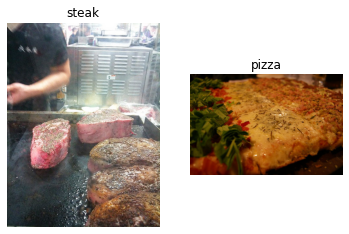

In [19]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [20]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
images, labels = train_data.next() 
len(images), len(labels)

(32, 32)

In [24]:
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [25]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [27]:
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), 
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') 
])

In [28]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [29]:
len(train_data), len(test_data)

(47, 16)

In [30]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 1.2310 - accuracy: 0.6700 - val_loss: 0.4460 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4442 - accuracy: 0.8087 - val_loss: 0.4178 - val_accuracy: 0.8100
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3192 - accuracy: 0.8787 - val_loss: 0.4337 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.1619 - accuracy: 0.9413 - val_loss: 0.5037 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.0904 - accuracy: 0.9747 - val_loss: 0.4960 - val_accuracy: 0.8080


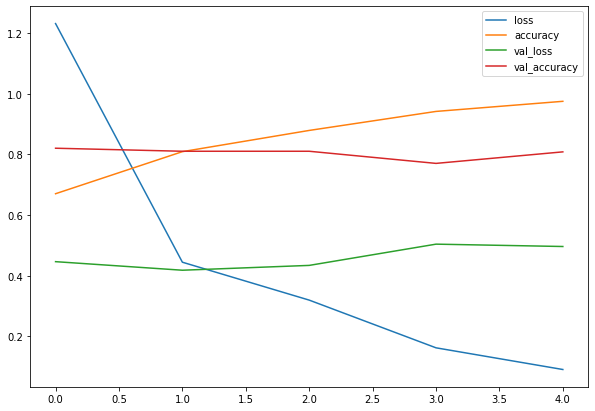

In [31]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [32]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

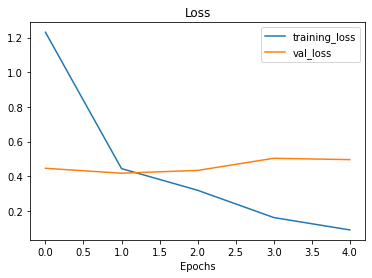

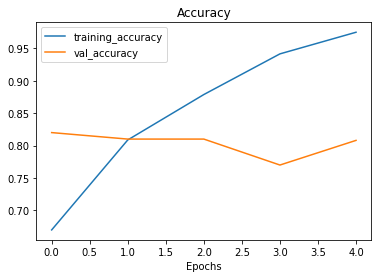

In [33]:
plot_loss_curves(history_4)

In [34]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [36]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [37]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 0.6222 - accuracy: 0.6487 - val_loss: 0.4890 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4847 - accuracy: 0.7840 - val_loss: 0.4089 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4232 - accuracy: 0.8193 - val_loss: 0.4331 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4213 - accuracy: 0.8047 - val_loss: 0.3431 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3821 - accuracy: 0.8373 - val_loss: 0.3716 - val_accuracy: 0.8280


In [38]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

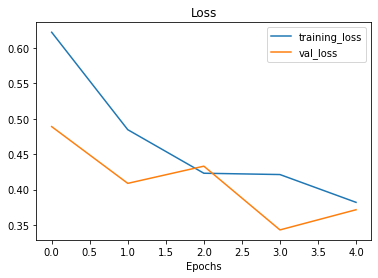

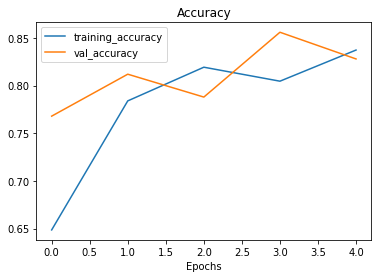

In [39]:
plot_loss_curves(history_5)

In [40]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             shear_range=0.2, 
                                             zoom_range=0.2,
                                             width_shift_range=0.2, 
                                             height_shift_range=0.2,
                                             horizontal_flip=True) 
train_datagen = ImageDataGenerator(rescale=1/255.) 
test_datagen = ImageDataGenerator(rescale=1/255.)

In [41]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) 

print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) 

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [42]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

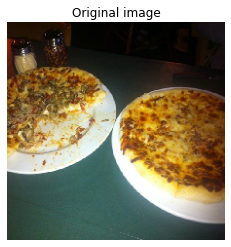

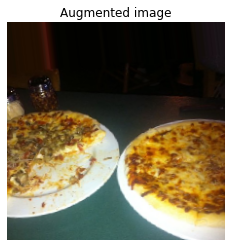

In [43]:
random_number = random.randint(0, 32) 
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [44]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 494ms/step - loss: 0.7532 - accuracy: 0.4860 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6924 - accuracy: 0.5073 - val_loss: 0.6808 - val_accuracy: 0.5680
Epoch 3/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6935 - accuracy: 0.5073 - val_loss: 0.6669 - val_accuracy: 0.5960
Epoch 4/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6825 - accuracy: 0.6427 - val_loss: 0.6573 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 22s 463ms/step - loss: 0.6949 - accuracy: 0.5673 - val_loss: 0.6625 - val_accuracy: 0.5280


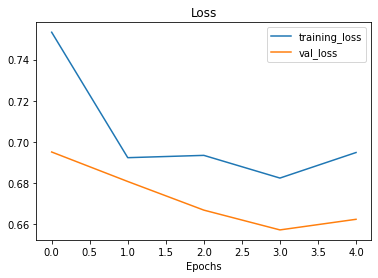

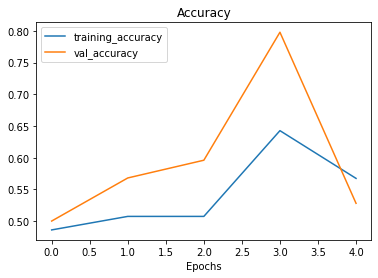

In [45]:
plot_loss_curves(history_6)

In [46]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [47]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled, 
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6002 - accuracy: 0.6740 - val_loss: 0.6982 - val_accuracy: 0.6160
Epoch 2/5
47/47 [==============================] - 22s 478ms/step - loss: 0.5130 - accuracy: 0.7467 - val_loss: 0.3715 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 22s 460ms/step - loss: 0.4968 - accuracy: 0.7567 - val_loss: 0.4312 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 22s 459ms/step - loss: 0.4683 - accuracy: 0.7767 - val_loss: 0.3361 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 22s 458ms/step - loss: 0.4710 - accuracy: 0.7820 - val_loss: 0.3489 - val_accuracy: 0.8480


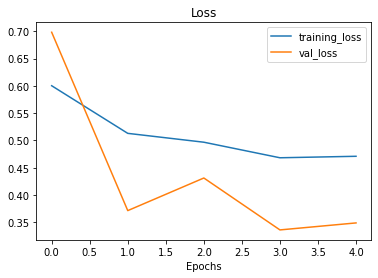

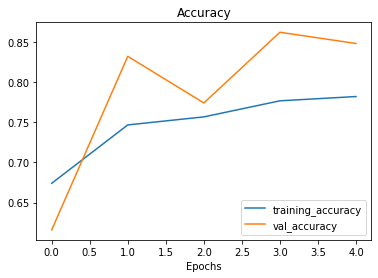

In [48]:
plot_loss_curves(history_7)

In [49]:
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 475ms/step - loss: 0.6350 - accuracy: 0.6227 - val_loss: 0.4830 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5460 - accuracy: 0.7267 - val_loss: 0.4027 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.5321 - accuracy: 0.7500 - val_loss: 0.4135 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 23s 488ms/step - loss: 0.4978 - accuracy: 0.7660 - val_loss: 0.3735 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 22s 473ms/step - loss: 0.5004 - accuracy: 0.7727 - val_loss: 0.3757 - val_accuracy: 0.8480


In [50]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [51]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

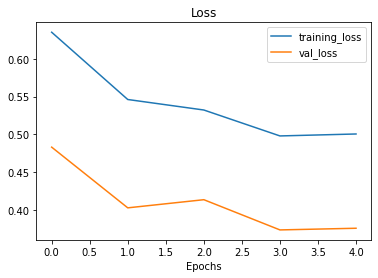

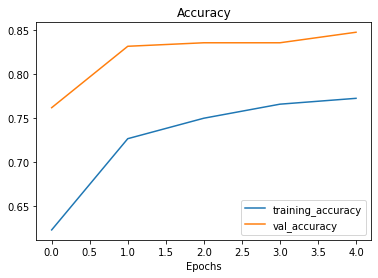

In [52]:
plot_loss_curves(history_8)

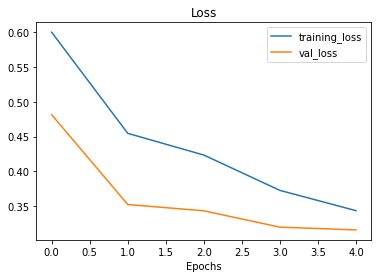

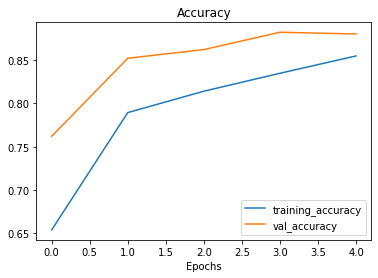

In [53]:
plot_loss_curves(history_1)

In [54]:
print(class_names)

['pizza' 'steak']


--2022-08-04 08:40:03--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2022-08-04 08:40:03 (187 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



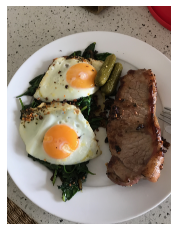

In [55]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [56]:
steak.shape

(4032, 3024, 3)

In [57]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

In [58]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [59]:
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0)
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [60]:
pred = model_8.predict(steak)
pred

array([[0.70255625]], dtype=float32)

In [61]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [62]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [63]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

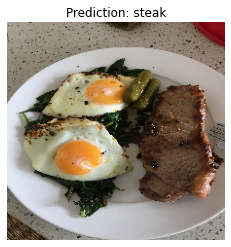

In [64]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2022-08-04 08:40:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.009s  

2022-08-04 08:40:06 (301 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



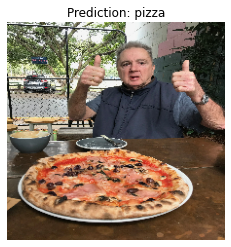

In [65]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

In [66]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-08-04 08:40:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  76.7MB/s    in 6.7s    

2022-08-04 08:40:14 (74.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [67]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [68]:

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [69]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 384, 3)


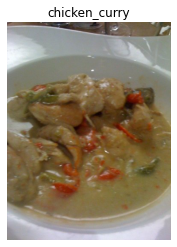

In [70]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') 
])

model_9.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [73]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 190ms/step - loss: 2.2140 - accuracy: 0.1757 - val_loss: 2.0976 - val_accuracy: 0.2364
Epoch 2/5
235/235 [==============================] - 45s 192ms/step - loss: 1.9692 - accuracy: 0.3148 - val_loss: 1.9562 - val_accuracy: 0.3076
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.6683 - accuracy: 0.4360 - val_loss: 1.9851 - val_accuracy: 0.2996
Epoch 4/5
235/235 [==============================] - 44s 186ms/step - loss: 1.0826 - accuracy: 0.6403 - val_loss: 2.3504 - val_accuracy: 0.2740
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.4868 - accuracy: 0.8476 - val_loss: 3.2546 - val_accuracy: 0.2648


In [74]:
model_9.evaluate(test_data)

79/79 [==============================] - 16s 199ms/step - loss: 3.2546 - accuracy: 0.2648


[3.254611015319824, 0.2648000121116638]

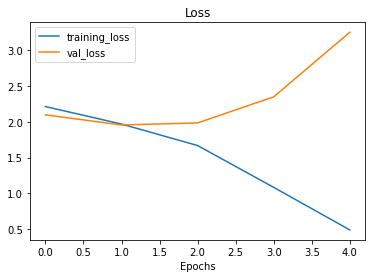

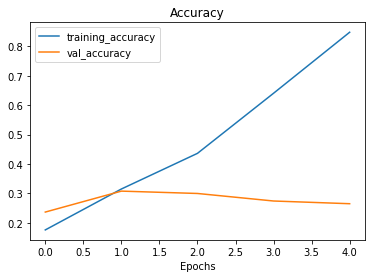

In [75]:
plot_loss_curves(history_9)

In [76]:
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 63s 266ms/step - loss: 2.1677 - accuracy: 0.2372 - val_loss: 1.9901 - val_accuracy: 0.2980
Epoch 2/5
235/235 [==============================] - 54s 229ms/step - loss: 1.8117 - accuracy: 0.3788 - val_loss: 1.8955 - val_accuracy: 0.3412
Epoch 3/5
235/235 [==============================] - 61s 260ms/step - loss: 1.5406 - accuracy: 0.4896 - val_loss: 1.9890 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 55s 233ms/step - loss: 1.0648 - accuracy: 0.6611 - val_loss: 2.1811 - val_accuracy: 0.3120
Epoch 5/5
235/235 [==============================] - 44s 188ms/step - loss: 0.6071 - accuracy: 0.8191 - val_loss: 2.5636 - val_accuracy: 0.3072


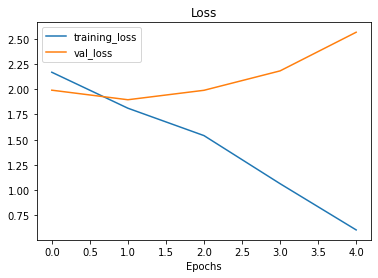

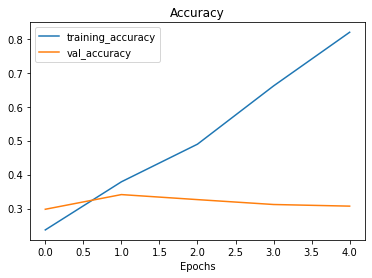

In [77]:
plot_loss_curves(history_10)

In [78]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [79]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_11 = model_11.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 112s 474ms/step - loss: 2.2569 - accuracy: 0.1785 - val_loss: 2.0621 - val_accuracy: 0.2824
Epoch 2/5
235/235 [==============================] - 108s 461ms/step - loss: 2.0738 - accuracy: 0.2640 - val_loss: 2.0348 - val_accuracy: 0.2820
Epoch 3/5
235/235 [==============================] - 107s 457ms/step - loss: 2.0211 - accuracy: 0.2949 - val_loss: 1.9198 - val_accuracy: 0.3268
Epoch 4/5
235/235 [==============================] - 107s 454ms/step - loss: 1.9812 - accuracy: 0.3121 - val_loss: 1.8687 - val_accuracy: 0.3524
Epoch 5/5
235/235 [==============================] - 108s 458ms/step - loss: 1.9524 - accuracy: 0.3244 - val_loss: 1.8212 - val_accuracy: 0.3740


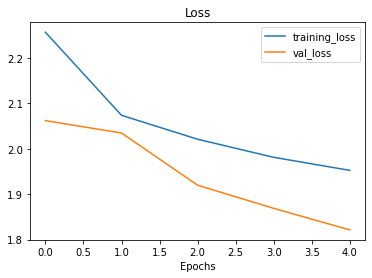

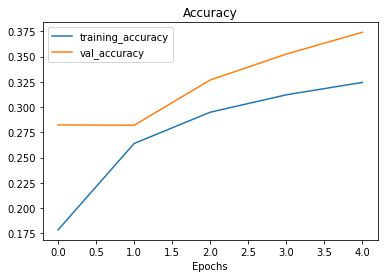

In [80]:
plot_loss_curves(history_11)

In [81]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [82]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

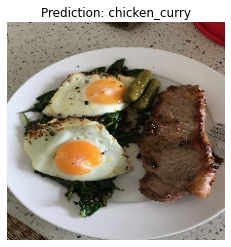

In [83]:
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

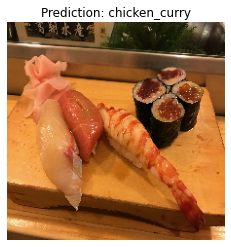

In [84]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

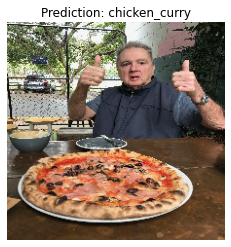

In [85]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

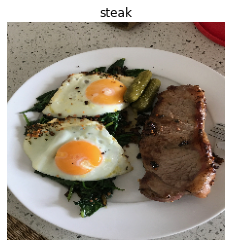

In [86]:
img = load_and_prep_image("03-steak.jpeg")
pred = model_11.predict(tf.expand_dims(img, axis=0))

pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [87]:
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

array([[0.03607238, 0.10355112, 0.01822596, 0.19357125, 0.05443049,
        0.03974474, 0.01090716, 0.05043729, 0.44008648, 0.05297313]],
      dtype=float32)

In [88]:
class_names[pred.argmax()]

'steak'

In [89]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1: 
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] 

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

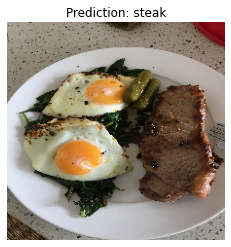

In [90]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

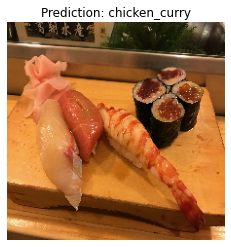

In [91]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

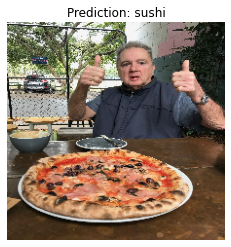

In [92]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

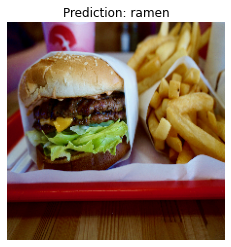

In [93]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

In [94]:
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [95]:
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [96]:
model_11.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 1.8212 - accuracy: 0.3740


[1.8211802244186401, 0.37400001287460327]